<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

### Exploratory Data Analysis

<div style="color:#00BFFF">

---

##### **Introduction:  Uncovering Reliable Proxies for Consumer Spending Behaviour**

**1.1. Introduction: The Problem (Why)**

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

**1.2. Project Scope and Objectives (What)**

The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

**1.3. Methodology**

The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

**1.4. Assumptions**

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.  

<div style="color:#00BFFF">

---

##### Setup Environment and import libraries

In [1]:
# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_61799/2839693654.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#load data generated from [1]M1_clean_and_preprocess.ipynb

#open defn
defn = pd.read_csv('./results/fred/fred_indicator_mappings.csv',index_col=0)

#open joined_dataset.csv
joined_dataset = pd.read_csv('./results/merged_data/joined_dataset_transformed.csv', index_col=0,parse_dates=False)

In [4]:
joined_dataset.tail()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
2022-07-01,17684.2,18856.687,15466.3,114.191,1487782.0,678202.0,103.5283,102.2519,102.1793,102.7122,106.6796,101.5783,98.2449,105.0056,98.6440,98.1465

<div style="color:#00BFFF">

---

##### Initial Correlation Analysis on the Transformed Data and Rate of Change Data

**Why**: 

Given our scenario where we are analyzing a large number of indicators (123) across a lengthy period (1960 to 2023) to find those that best correlate with private consumption expenditure, and we want to `retain NaN` values due to their economic significance, `Spearman's rank correlation` with pairwise deletion seems to be the most appropriate. 

It respects the economic significance of NaN values while providing a robust correlation measure. However, we need to ensure to perform a sensitivity analysis to understand the impact of missing values results. Also, consider the potential for non-random missing data and its implications.

**What**: 
`Spearman's rank correlation` is non-parametric and does not assume a linear relationship between variables, which can be more appropriate for economic data. It also handles NaN values by default in many implementations, like in Python's Pandas library, where it ignores pairs where either value is NaN. 

**Benefits**: 

Accounts for monotonic relationships and is less sensitive to outliers (which is relevant given that you have replaced some extreme values with NaN).

**Spearman's rank correlation for log transformed data**

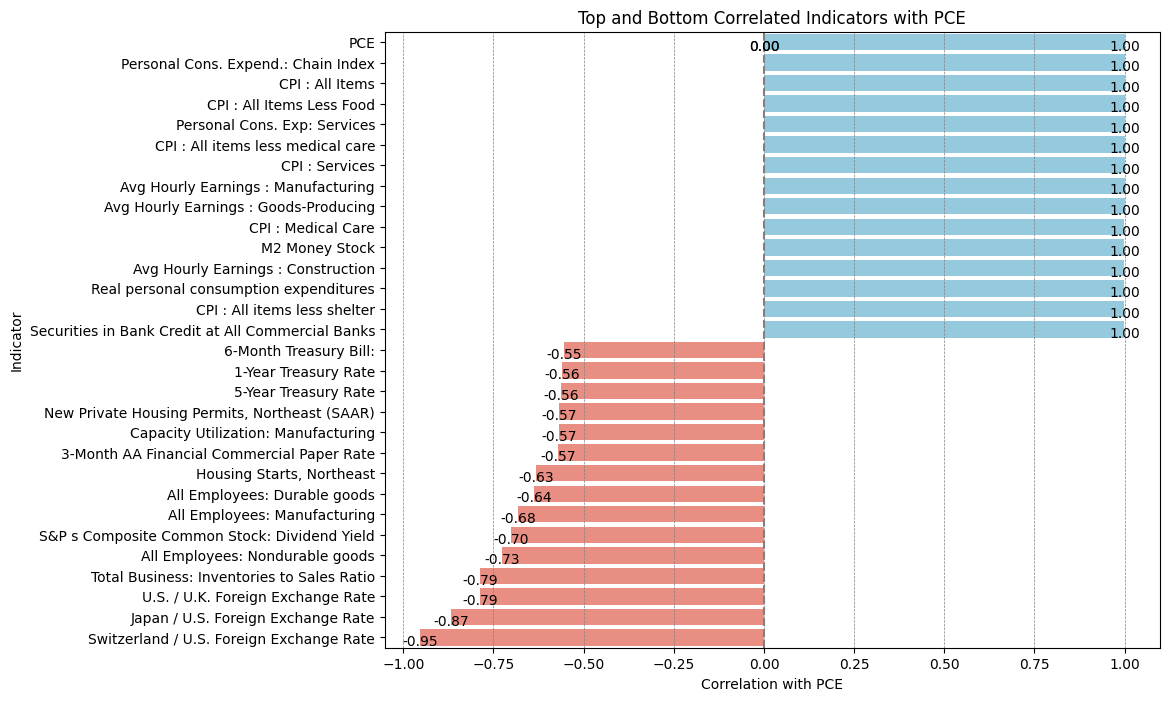

In [5]:
from utils.visualisation import plot_correlations

# Calculate the Spearman's rank correlation with the private consumption expenditure, handling NaNs with pairwise deletion.
correlation_matrix = joined_dataset.corr(method='spearman') #spearman

#target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix['PCE'].sort_values(ascending=False)

plot_correlations(target_correlations,15,15)


<div style="color:#00BFFF">

---
##### Create data frame to hold most positively and negatively correlated indicators

In [6]:
def calculate_sorted_correlations(dataset, target_column):
    """
    Calculate Pearson correlations of all columns in the dataset with a target column,
    sort them by the absolute value of the correlation, and return as a Series while retaining
    the original positive or negative signs.

    :param dataset: Pandas DataFrame containing the data
    :param target_column: String, the name of the column to correlate with
    :return: Pandas Series with sorted correlations
    """
    # Ensure the index is in datetime format
    dataset.index = pd.to_datetime(dataset.index)

    # Calculate Pearson correlation with target column
    correlation_with_target = dataset.corrwith(dataset[target_column],method='pearson')

    # Sort the correlations by absolute value, but retain the original values
    sorted_correlations = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

    # Return the sorted correlations as a Series
    return sorted_correlations

# Initial calculation
top_correlations = calculate_sorted_correlations(joined_dataset, 'PCE')

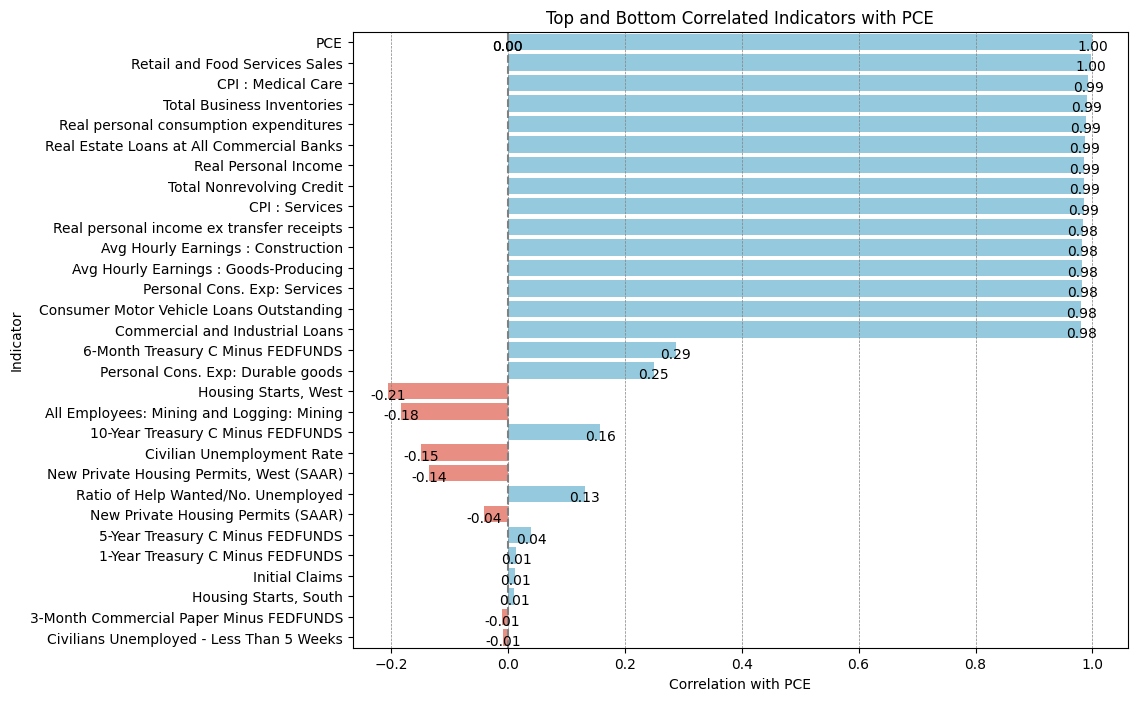

In [7]:
from utils.visualisation import plot_correlations

plot_correlations(top_correlations,15,15)

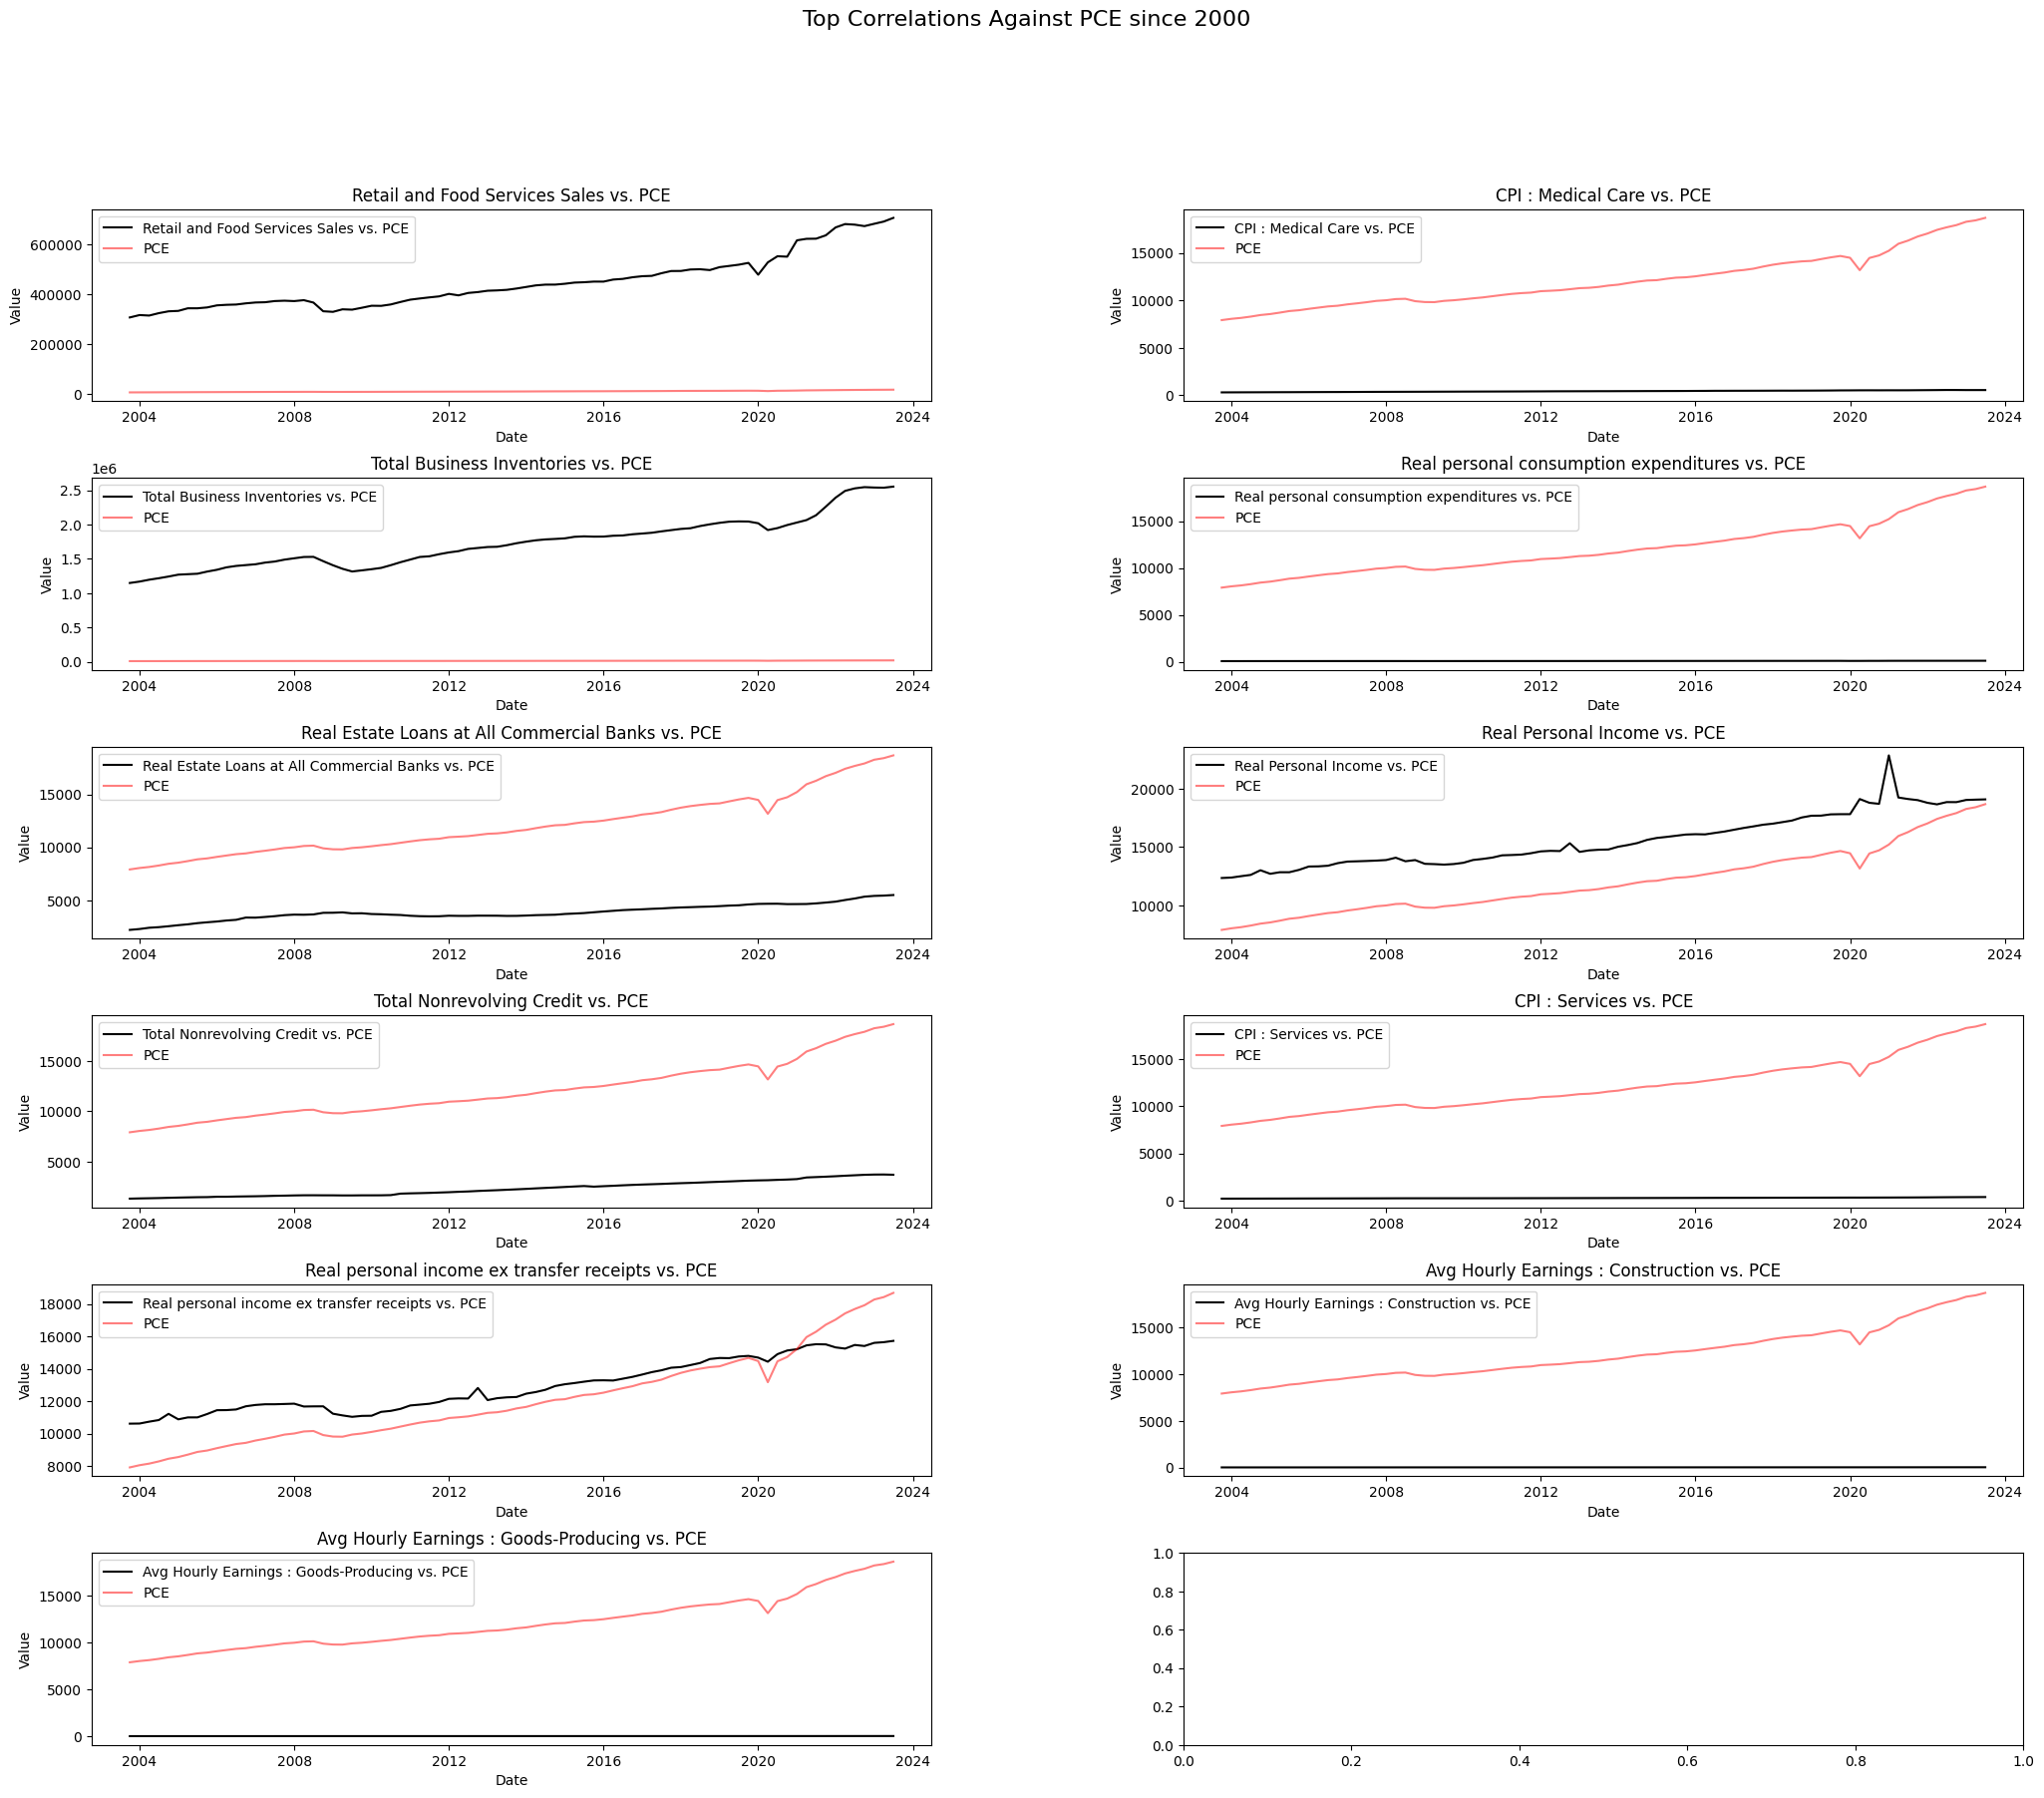

In [8]:
def top_indicators_against_pce_line_graph(df):
    # Initial calculation
    top_correlations = calculate_sorted_correlations(df, 'PCE')
    
    # Extract the top correlated features excluding 'PCE'
    top_features = [feature for feature in top_correlations.index[:12] if feature != 'PCE']

    # Setup the figure and subplots
    fig, axs = plt.subplots(6, 2, figsize=(25, 20))  # Adjust figsize as needed
    fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing as needed

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Plot each feature in its subplot against PCE
    for i, feature in enumerate(top_features):
        # Plotting feature against PCE
        axs[i].plot(df.index[-80:], df[feature][-80:], label=f'{feature} vs. PCE',color='black')
        axs[i].plot(df.index[-80:], df['PCE'][-80:], label='PCE', color='red',alpha=0.5)
        axs[i].set_title(f'{feature} vs. PCE')
        axs[i].set_xlabel('Date') 
        axs[i].set_ylabel('Value')
        axs[i].legend()

    # Ensure we only use the subplots needed for the top features
    for j in range(i + 1, 10):
        fig.delaxes(axs[j])

    # Add an overall title
    fig.suptitle('Top Correlations Against PCE since 2000', fontsize=16)

    # Show the plot
    plt.show()

top_indicators_against_pce_line_graph(joined_dataset)

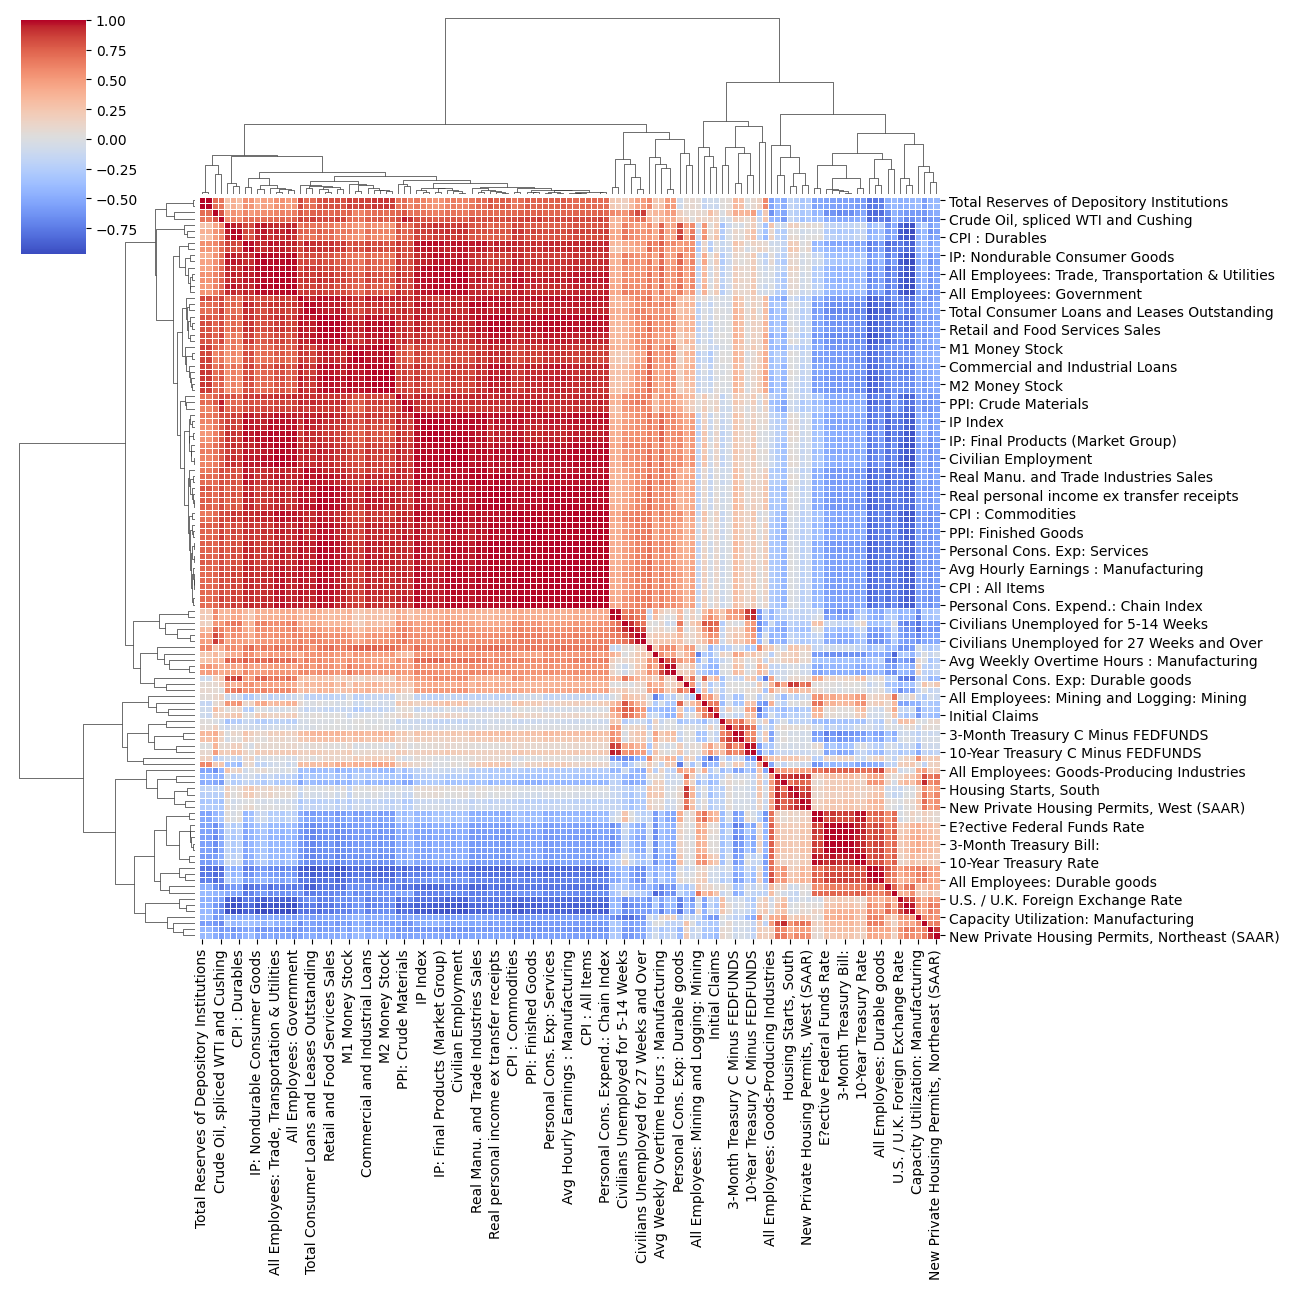

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clustermap_of_correlations(dataset, method='pearson', cluster_threshold=None):
    """
    Plots a clustermap (hierarchical clustering heatmap) of the correlation matrix of the dataset.

    :param dataset: Pandas DataFrame containing the data.
    :param method: String, method of correlation (default 'pearson'). Other methods include 'spearman' and 'kendall'.
    :param cluster_threshold: Float, the threshold to apply a cutoff in the dendrogram. Clusters below this threshold are not shown.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataset.corr(method=method)

    # Create a clustermap
    clustergrid = sns.clustermap(correlation_matrix, method='average', cmap='coolwarm', linewidths=.5, figsize=(13, 13))
    
    # Apply a threshold to the clustering to clean up the dendrogram, if specified
    if cluster_threshold is not None:
        sns.clustermap(correlation_matrix, method='average', cmap='coolwarm', linewidths=.5, figsize=(13, 13), 
                       col_cluster=False, row_cluster=False, color_threshold=cluster_threshold)

    plt.setp(clustergrid.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
    plt.show()
    
# Example usage:
plot_clustermap_of_correlations(joined_dataset)


<div style="color:#00BFFF">

---

##### Interpretation of EDA Findings


**The following sections detail the insights gathered from our EDA.**

**High Correlation Amongst Variables**

Our initial correlation analysis revealed extremely high correlations among many economic variables. This phenomenon is not uncommon in economic datasets where multiple indicators may reflect similar underlying economic factors. For example:

- **Labour Market Indicators**: Variables related to employment and wages, such as 'Avg Hourly Earnings' across different sectors, show strong correlations as they all capture aspects of the labour market.
- **Consumer Price Index (CPI) Data**: The 'CPI All Items' index and its subcomponents, such as 'CPI Medical Care' and 'CPI Services', tend to move in tandem since they are facets of the overall inflation measure.

These highly correlated variables suggest redundancy, implying that some indicators may provide overlapping information. Such redundancy can inflate the apparent importance of these factors in subsequent analyses and may need consolidation or exclusion to prevent multicollinearity issues in our modeling efforts.

**Comparability of Measurements**
Upon reviewing temporal line graphs, it became evident that the measurements across variables are not directly comparable. The dataset comprises a variety of units, including currencies, ratios, indices, rates, percentages, and quantities scaled in millions or billions of dollars or thousands of persons. This diversity in units poses a significant challenge:

- **Unit Diversity**: Without standardization, direct comparisons or aggregations of these variables may lead to incorrect conclusions or ineffective models.
- **Scaling and Transformation**: It is crucial to bring these variables to a common scale or transform them appropriately to facilitate meaningful comparison and analysis.

**Multicollinearity Investigation**
The circular heatmap, a tool to visualize complex relationships, highlighted an extremely high level of multicollinearity among variables. This insight is particularly concerning for several reasons:

- **Model Stability and Interpretation**: High multicollinearity can destabilize our models and make the interpretation of individual variable effects problematic.
- **Variable Selection**: The presence of multicollinearity necessitates a careful approach to variable selection, ensuring that our models are both robust and interpretable.


<div style="color:#00BFFF">

---

##### Actionable Steps



To address these findings and prepare for model building and proxy selection, we propose the following steps:

2. **Standardization and Normalization**: Apply standardization or normalization procedures to ensure that variables are on a comparable scale, especially before PCA or any regression analysis.
3. **Creating composite indices** is a preemptive step to **decrease collinearity**, enhancing the effectiveness of our end model fitting. 
- This approach aims to consolidate related indicators into single measures, thereby simplifying the dataset and improving model interpretability and performance.
4. **Proxy Selection**: Adopt a strategic approach to select proxies that not only exhibit strong correlations with our target, PCE, but also add unique information without causing multicollinearity.
5. **Variable Reduction**: Implement dimensionality reduction techniques, such as Principal Component Analysis (PCA), to consolidate the information from highly correlated variables into fewer representative components.

By addressing these concerns systematically, we aim to refine our dataset for subsequent modeling phases, ensuring the reliability and validity of our findings as we progress in our analysis.

<div style="color:#00BFFF">

---

##### Differencing (through Rate of Change Q-o-Q) 

**Method:** By applying `.diff()` to our dataset, we calculate the rate of change of various indicators from one period to the next. This transformation facilitates more meaningful analysis across diverse data points by standardizing differences, accounting for variations in magnitude and unit measurements.

Utilizing the rate of change is particularly effective in the context of economic data and nowcasting models for several reasons:

**Advantages**

1. **Comparability**: Enhances comparisons across different indicators by normalizing scale and unit differences.
2. **Trend Analysis**: Highlights trends and growth rates, offering deeper insights than absolute levels.
3. **Stationarity**: Aids in achieving stationarity for time series data, a prerequisite for many econometric models.
4. **Handling Non-Linearity**: Log transformations, followed by rate of change calculation, can linearize growth patterns for linear modeling.
5. **Economic Relevance**: Growth rates (rate of change) are often more meaningful in economic contexts, such as GDP growth analysis.

**Considerations**

- **Loss of Level Information**: This method shifts focus from absolute levels, which might still hold relevance.
- **Volatility**: Can amplify volatility, especially for series with minor fluctuations in absolute terms.
- **Interpretability**: It's important to ensure the data remains interpretable and aligned with economic theories and intuition.

In [10]:
joined_dataset = joined_dataset.diff()

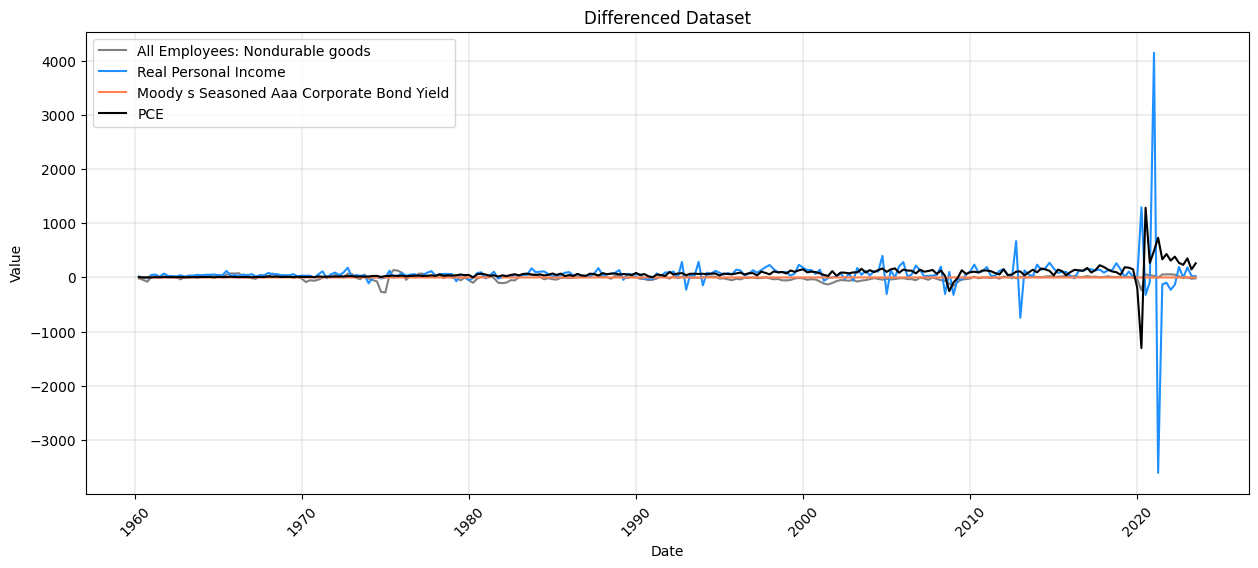

In [11]:
from utils.visualisation import plot_dataset

#plot after each transformation
plot_dataset(joined_dataset, "Differenced Dataset")

<div style="color:#00BFFF">

---

##### Creating Composite indexes 

**Objective**
- **Reduce collinearity** among the 123 economic indicators in the dataset by creating composite indices. The dataset includes **multiple indicators that are components of each other**, covering totals and granular levels, or different measures providing similar information.
- **Creating composite indices** is a preemptive step to **decrease collinearity**, enhancing the effectiveness of our end model fitting. 
- This approach aims to consolidate related indicators into single measures, thereby simplifying the dataset and improving model interpretability and performance.

**Process**

1. **Importing Composite Indices Mapping**:
   -  We import a pre-defined dictionary, `composite_indices_info`, from a module located in the `utils` subfolder. 
   -  This dictionary maps economic indicators to their respective composite indices, indicating how individual data columns should be aggregated.

**2. Merge and Clean Data**
   - The `merge_and_clean_data` function incorporates composite indices into the main dataset.
   - Removes original indicators that are now aggregated, reducing dataset complexity and potential multicollinearity.
   - Drop granular indices and keep Total Indices

**3. Dataframe Update**
   - Post-merging, drops the aggregated columns from the `joined_dataset`.
   - Cleans the `defn` dataset to exclude removed indicators, maintaining dataset integrity and relevance.


In [12]:

def create_composite_index(dataframe, columns_to_combine, index_name, method='mean'):
    """
    Create a composite index by combining specified columns in a dataframe using a given method.
    If columns are missing, they are ignored in the calculation.
    """
    # Filter out columns that are not in the dataframe
    existing_columns = [col for col in columns_to_combine if col in dataframe.columns]

    # If no valid columns are left, raise an error or handle it according to your logic
    if not existing_columns:
        raise ValueError(f"None of the specified columns {columns_to_combine} are present in the dataframe.")
    
    # Proceed with calculation using existing columns only
    if method == 'mean':
        composite = dataframe[existing_columns].mean(axis=1)
    elif method == 'sum':
        composite = dataframe[existing_columns].sum(axis=1)
    else:
        raise ValueError("Method must be 'mean' or 'sum'.")

    return pd.DataFrame({index_name: composite})


def merge_and_clean_data(joined_dataset, defn, composite_indices_info):
    """
    Merge the composite indices into the joined dataset and remove the old indicators,
    while handling missing columns and avoiding creating indices from single indicators.
    """
    columns_to_drop = []

    for index_name, (columns, method) in composite_indices_info.items():
        # Filter columns to ensure they exist in the dataset
        existing_columns = [col for col in columns if col in joined_dataset.columns]

        # Skip index creation if no columns exist or only one column exists
        if len(existing_columns) > 1:
            composite_df = create_composite_index(joined_dataset, existing_columns, index_name, method)
            joined_dataset = pd.merge(joined_dataset, composite_df, left_index=True, right_index=True, how='left')
            columns_to_drop.extend(existing_columns)  # Add only existing columns to the drop list
        elif len(existing_columns) == 1:
            # If there's only one column, decide whether to rename it or leave as is based on your logic
            # Example: joined_dataset.rename(columns={existing_columns[0]: index_name}, inplace=True)
            pass  # No action if you decide to leave the single indicator as is

    # Drop columns that were successfully combined into indices, ensuring they exist in the dataset
    columns_to_drop = [col for col in columns_to_drop if col in joined_dataset.columns]
    if columns_to_drop:
        joined_dataset.drop(columns=columns_to_drop, inplace=True)

    # Adjust defn dataframe if necessary, based on your application's logic
    # This part remains unchanged, assuming `defn` is adjusted based on columns_to_drop
    defn_cleaned = defn[~defn['description'].isin(columns_to_drop)]

    return joined_dataset, defn_cleaned



In [13]:
from utils.composite_index_mapping import composite_indices_info

#  merge and clean function
joined_dataset, defn = merge_and_clean_data(joined_dataset, defn, composite_indices_info)

<div style="color:#00BFFF">

---

##### Drop granular indices and keep Total Indices

In [14]:

granular_indices_to_drop = [
    #Granular Housing data keep-> 'Housing Starts: Total New Privately Owned', 'New Private Housing Permits (SAAR)'
    'Housing Starts, Midwest',
    'Housing Starts, Northeast',
    'Housing Starts, South',
    'Housing Starts, West',
    'New Private Housing Permits, Midwest (SAAR)',
    'New Private Housing Permits, Northeast (SAAR)',
    'New Private Housing Permits, South (SAAR)',
    'New Private Housing Permits, West (SAAR)',
    
    #Granular CPI data -> keep "CPI : All Items"
    'CPI : All Items Less Food',
    'CPI : All items less medical care',
    'CPI : All items less shelter',
    'CPI : Apparel',
    'CPI : Commodities',
    'CPI : Durables',
    'CPI : Medical Care',
    'CPI : Services',
    'CPI : Transportation',
    'All Employees: Goods-Producing Industries',
    
    #granular unemploymnet data -> keep "civilian unemployment rate" 
    'All Employees: Total nonfarm',
    'Civilians Unemployed - 15 Weeks & Over',
    'Civilians Unemployed - Less Than 5 Weeks',
    'Civilians Unemployed for 15-26 Weeks',
    'Civilians Unemployed for 27 Weeks and Over',
    'Civilians Unemployed for 5-14 Weeks',
    
    #keep -> Total Reserves of Depository Institutions
    'Reserves Of Depository Institutions',
    
    #keep -> real personl income
    'Real personal income ex transfer receipts'
    ]
joined_dataset.drop(columns=granular_indices_to_drop, inplace=True)

#delet rows in defn where the value is in columns_to_drop
defn = defn[~defn['description'].isin(granular_indices_to_drop)]

<div style="color:#00BFFF">

---

##### Results after transformations

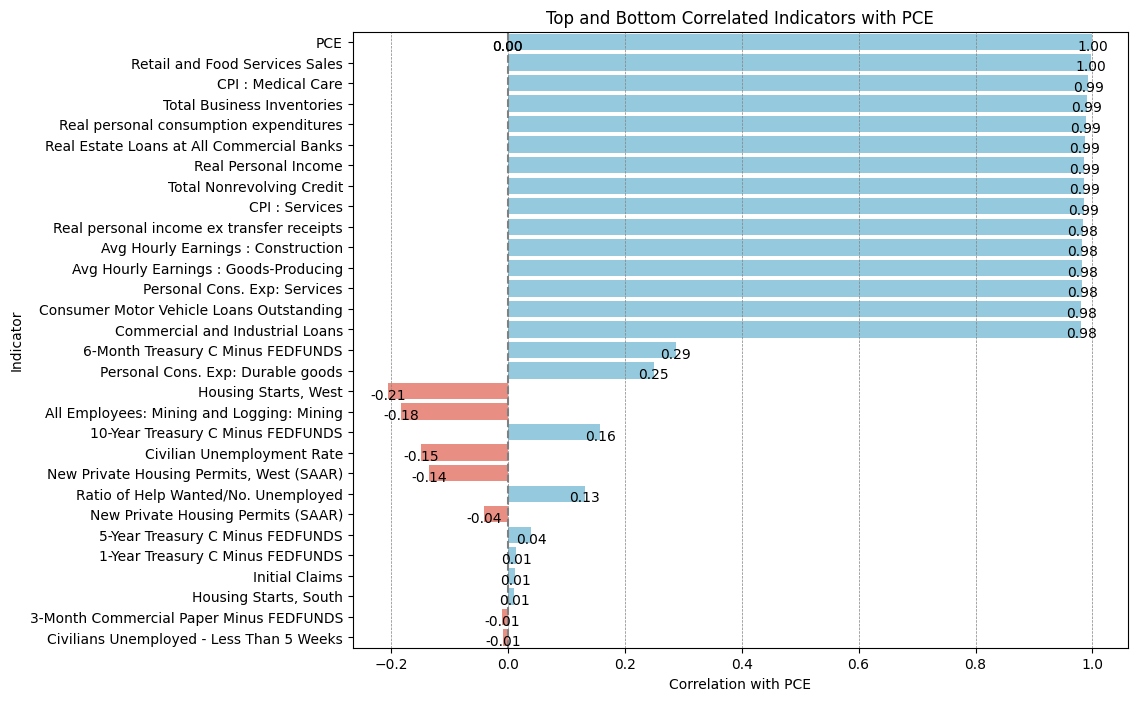

In [15]:
plot_correlations(top_correlations,15,15)

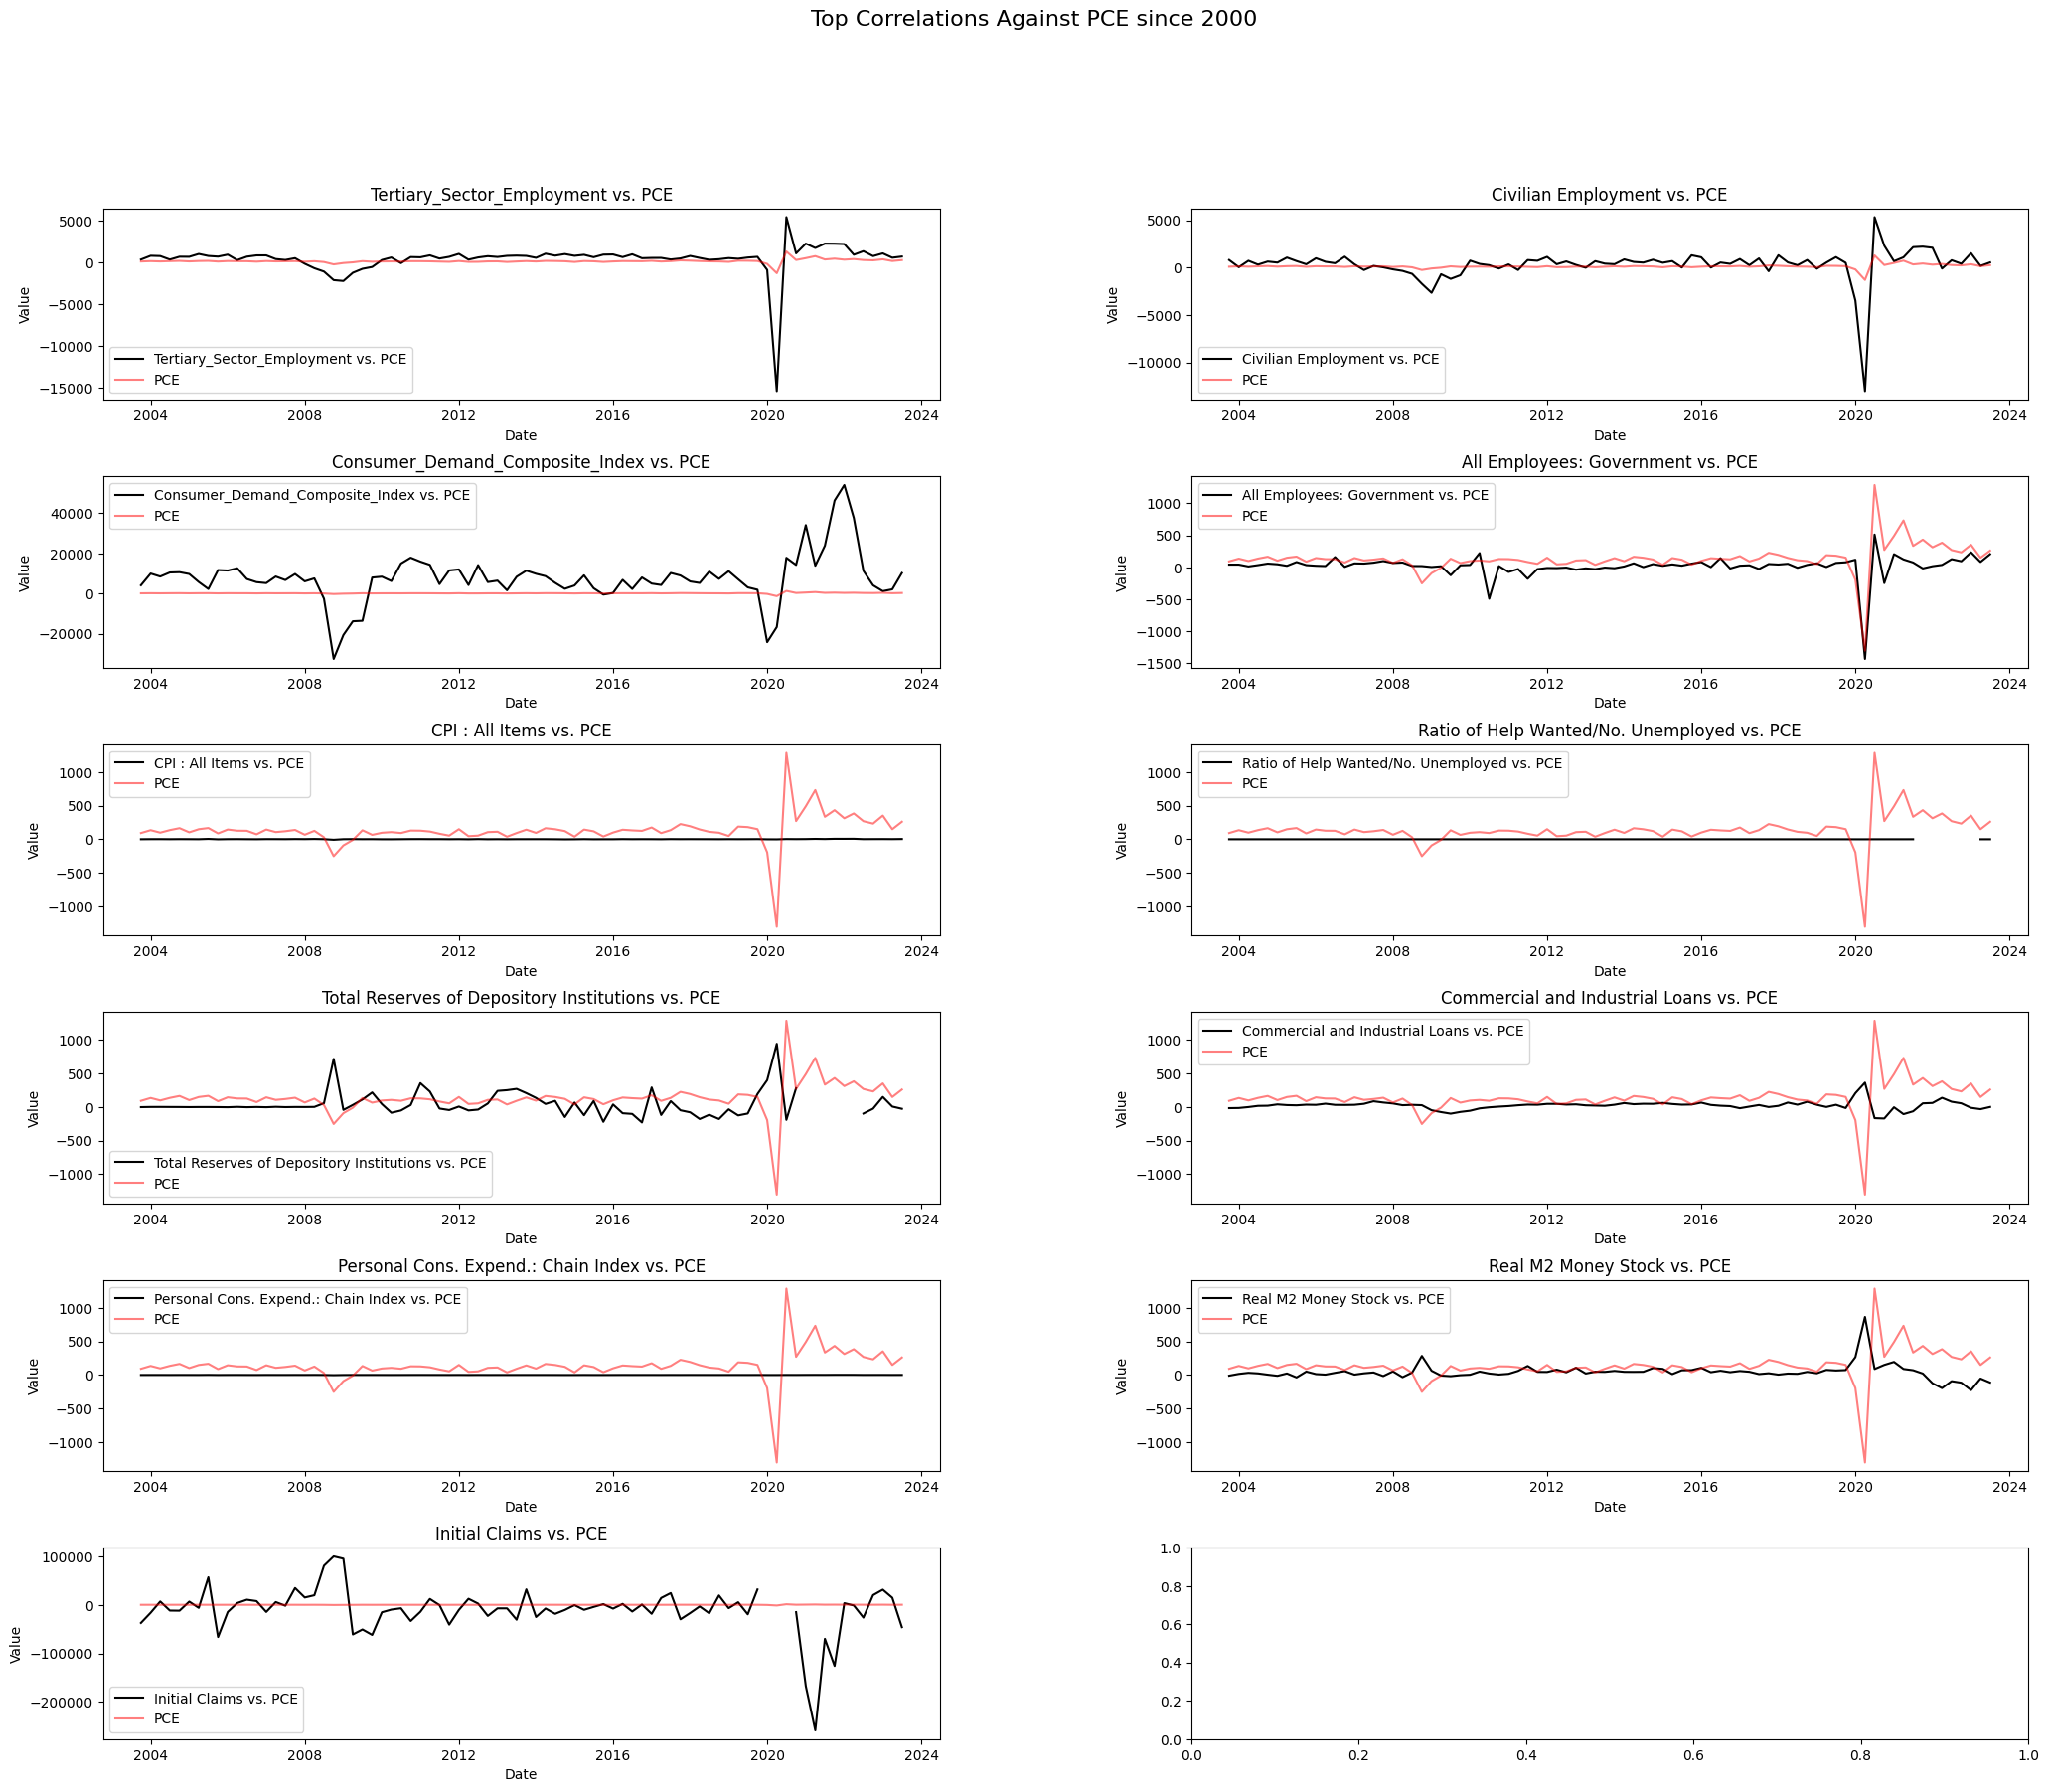

In [16]:
top_indicators_against_pce_line_graph(joined_dataset)

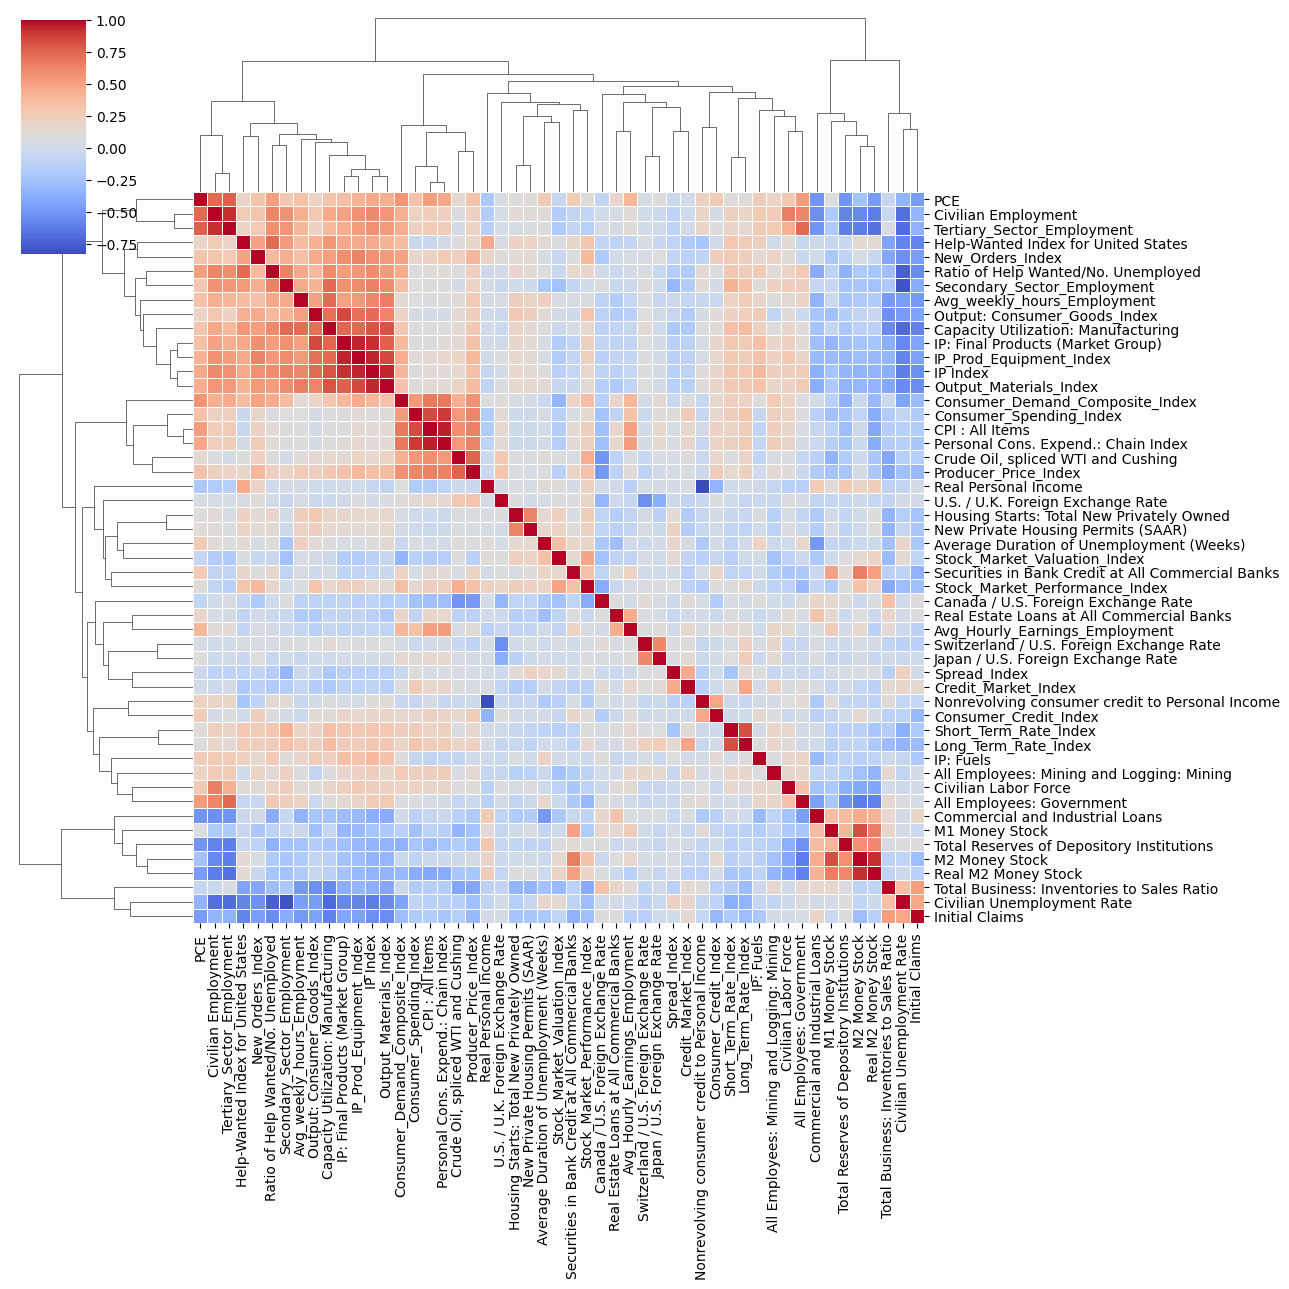

In [17]:
plot_clustermap_of_correlations(joined_dataset)

<div style="color:#00BFFF">

---

##### Further Inspecting for multicolinearity and handling with Variance Inflation Factor (VIF)

When using multiple indicators, there's a risk of multicollinearity, where indicators are highly correlated with each other. This can distort the importance of individual variables in a regression model.

Inspecting a correlation matrix or heatmap can visually reveal if any two variables are highly correlated, which might suggest multicollinearity.


VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A VIF value greater than 10 is often considered indicative of multicollinearity.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = joined_dataset.copy()

pce = X['PCE']

# Exclude 'PCE' from VIF calculation but keep it in the dataset
X_without_PCE = X.drop(columns=['PCE']) if 'PCE' in X.columns else X.copy()

# Handle missing (NaN) and infinite (inf) values
X_without_PCE = X_without_PCE.fillna(X_without_PCE.mean())

vif_data = pd.DataFrame()
vif_data["feature"] = X_without_PCE.columns
vif_data["VIF"] = [variance_inflation_factor(X_without_PCE.values, i) for i in range(X_without_PCE.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)


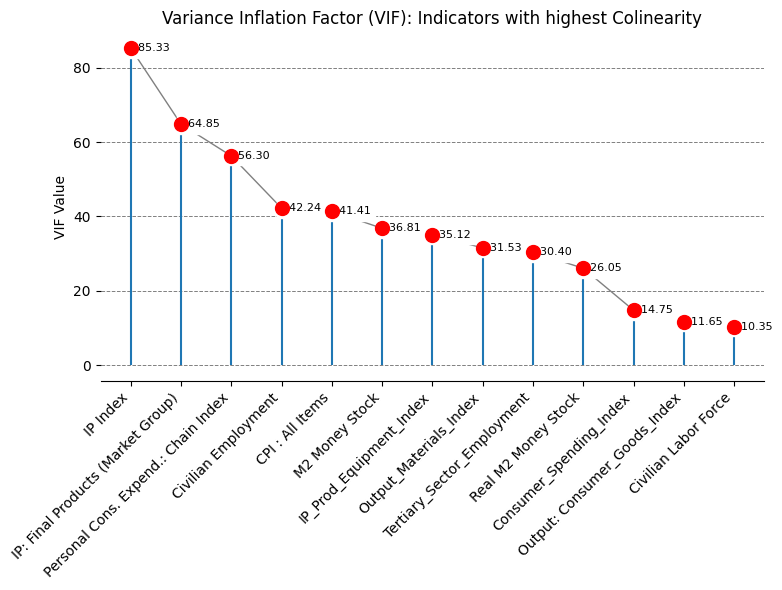

In [19]:
def lollipop(data,threshold=10):

    # Filtering VIF values above 10
    df_filtered = data[data['VIF'] > threshold]

    # Creating the lollipop chart
    plt.figure(figsize=(8, 6))
    plt.stem(df_filtered['feature'], df_filtered['VIF'], basefmt=" ") #, use_line_collection=True)

    # Customizing the plot with the color scheme
    plt.scatter(df_filtered['feature'], df_filtered['VIF'], color='red', s=100, label=f'VIF > {threshold}', zorder=5)
    plt.plot(df_filtered['feature'], df_filtered['VIF'], color='grey', linestyle='-', linewidth=1, zorder=3)

    # Adding text labels for each value
    for i, row in df_filtered.iterrows():
        plt.text(row['feature'], row['VIF'], f"  {row['VIF']:.2f}", va='center', ha='left', backgroundcolor='white', fontsize=8)

    # Enhancing the design
    plt.xticks(rotation=45, ha="right")
    plt.ylabel('VIF Value')
    plt.title('Variance Inflation Factor (VIF): Indicators with highest Colinearity')
    plt.grid(axis='y', linestyle='--', linewidth=0.7, color='grey', zorder=0)
    plt.tight_layout()

    # Hide the left, top, and right frame lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    # Show the plot
    plt.show()

lollipop(vif_data,10)

<div style="color:#00BFFF">

**Handling highest VIF indciators**
</div>

- This code snippet performs a Variance Inflation Factor (VIF) analysis to identify and remove multicollinear features from a dataset, except for those specifically ignored. 
- It iterates through the dataset, calculating VIFs for all features not in the `ignored_columns` list. 
- If a feature's VIF exceeds 20, indicating high multicollinearity, and it's not on the ignored list, that feature is dropped from the dataset. 
- The process repeats until no feature's VIF exceeds 20, ensuring the remaining dataset has reduced multicollinearity, enhancing model reliability.

In [20]:
# Define a list of columns to ignore in the VIF calculation

ignored_columns = ["Civilian Unemployment Rate","Civilian Employment",
                    "Housing Starts: Total New Privately Owned",
                    "Civilian Labor Force","CPI_Index","IP Index",
                    'Personal Cons. Expend.: Chain Index'
                    ]  

# A Loop to Find and drop the variable with the highest VIF if it's not in the ignored list

while True:
    # Calculate VIF for features not in the ignored list
    vif_data = pd.DataFrame()
    vif_data["feature"] = [column for column in X_without_PCE.columns if column not in ignored_columns]
    vif_data["VIF"] = [variance_inflation_factor(X_without_PCE[vif_data["feature"]].values, i) for i in range(len(vif_data["feature"]))]

    # Find and drop the variable with the highest VIF if it's not in the ignored list
    max_vif = vif_data["VIF"].max()
    if max_vif > 10:  
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
        if feature_to_drop not in ignored_columns:
            X_without_PCE.drop(columns=[feature_to_drop], inplace=True)
            print(f"Dropping {feature_to_drop} with VIF: {max_vif}")
        else:
            # If the top VIF feature is in the ignore list, remove it from the VIF dataframe and continue
            vif_data = vif_data[vif_data["feature"] != feature_to_drop]
    else:
        break

Dropping IP: Final Products (Market Group) with VIF: 40.18649351287483
Dropping M2 Money Stock with VIF: 34.549298149504814
Dropping CPI : All Items with VIF: 16.48889390945672
Dropping Tertiary_Sector_Employment with VIF: 15.350973773692205


In [21]:
#filter joined_dataset to only include the columns in vif_data.feature
refined_dataset = joined_dataset[vif_data.feature] 

#add the PCE column back to the filtered dataset
refined_dataset['PCE'] = joined_dataset['PCE']

#update the top_bottom_cor_refined
top_correlations_refined = calculate_sorted_correlations(refined_dataset, 'PCE')

refined_dataset.head()

,Real Personal Income,IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Average Duration of Unemployment (Weeks),Initial Claims,All Employees: Mining and Logging: Mining,All Employees: Government,New Private Housing Permits (SAAR),Total Business: Inventories to Sales Ratio,M1 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Nonrevolving consumer credit to Personal Income,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,"Crude Oil, spliced WTI and Cushing",Securities in Bank Credit at All Commercial Banks,Secondary_Sector_Employment,Avg_Hourly_Earnings_Employment,Avg_weekly_hours_Employment,Output: Consumer_Goods_Index,Output_Materials_Index,IP_Prod_Equipment_Index,Short_Term_Rate_Index,Long_Term_Rate_Index,Spread_Index,Credit_Market_Index,Stock_Market_Performance_Index,Stock_Market_Valuation_Index,Consumer_Spending_Index,Producer_Price_Index,Consumer_Credit_Index,Consumer_Demand_Composite_Index,New_Orders_Index,PCE
1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN
1960-04-01,17.996,-0.0787,-3.0185,-103.0,-0.032723,-1.1,12826.0,-7.2,-93.0,3.0,0.030993,-0.2,3.2,0.3,1.3384,0.0071,0.001996,-0.0219,0.6514,-0.0032,0.0314,0.0,-0.3432,-364.0,-0.016667,-0.133333,0.154300,-0.774367,-0.277933,-0.800000,-0.316667,-0.038333,0.092,2.295,0.161736,0.023333,-0.06,309.174727,316.311823,-4837.81713,5.8
1960-07-01,4.075,0.5903,-2.3049,-151.0,-0.053253,1.0,32120.0,-3.7,62.0,26.0,0.000000,1.6,20.6,0.3,0.0442,0.1108,0.001553,-0.0082,-2.4629,0.0100,-0.0098,0.0,2.8198,-312.0,0.026667,-0.333333,-0.418900,-0.418467,-0.362733,-0.103333,-0.383333,0.476667,-0.036,-2.775,-0.164767,-0.037000,-0.08,171.992530,68.878793,2308.59718,-0.1
1960-10-01,-16.136,-0.1181,-3.6630,-164.0,-0.102189,-0.5,18503.0,-20.3,103.0,-33.0,0.010331,-0.5,6.5,0.7,0.7045,0.2171,0.001721,-0.0011,0.7741,-0.0053,0.0099,0.0,4.2492,-863.0,0.010000,-0.300000,-0.557467,-0.987967,-0.511567,-0.240000,-0.036667,0.481667,0.200,2.125,0.294852,0.025667,-0.14,0.886887,-457.635217,-8248.47006,1.9
1961-01-01,46.173,-0.1181,-0.3920,6.0,-0.014215,1.7,10565.0,-13.4,14.0,49.0,-0.030993,1.2,18.7,-0.5,-0.0533,0.2415,-0.001460,0.0151,-0.6454,-0.0099,0.0050,0.0,0.7494,-242.0,0.016667,0.100000,-0.155233,0.360767,0.054067,-0.006667,-0.050000,-0.068333,-0.092,7.465,1.057282,0.065000,-0.10,-243.523283,-289.561330,-872.79368,0.5


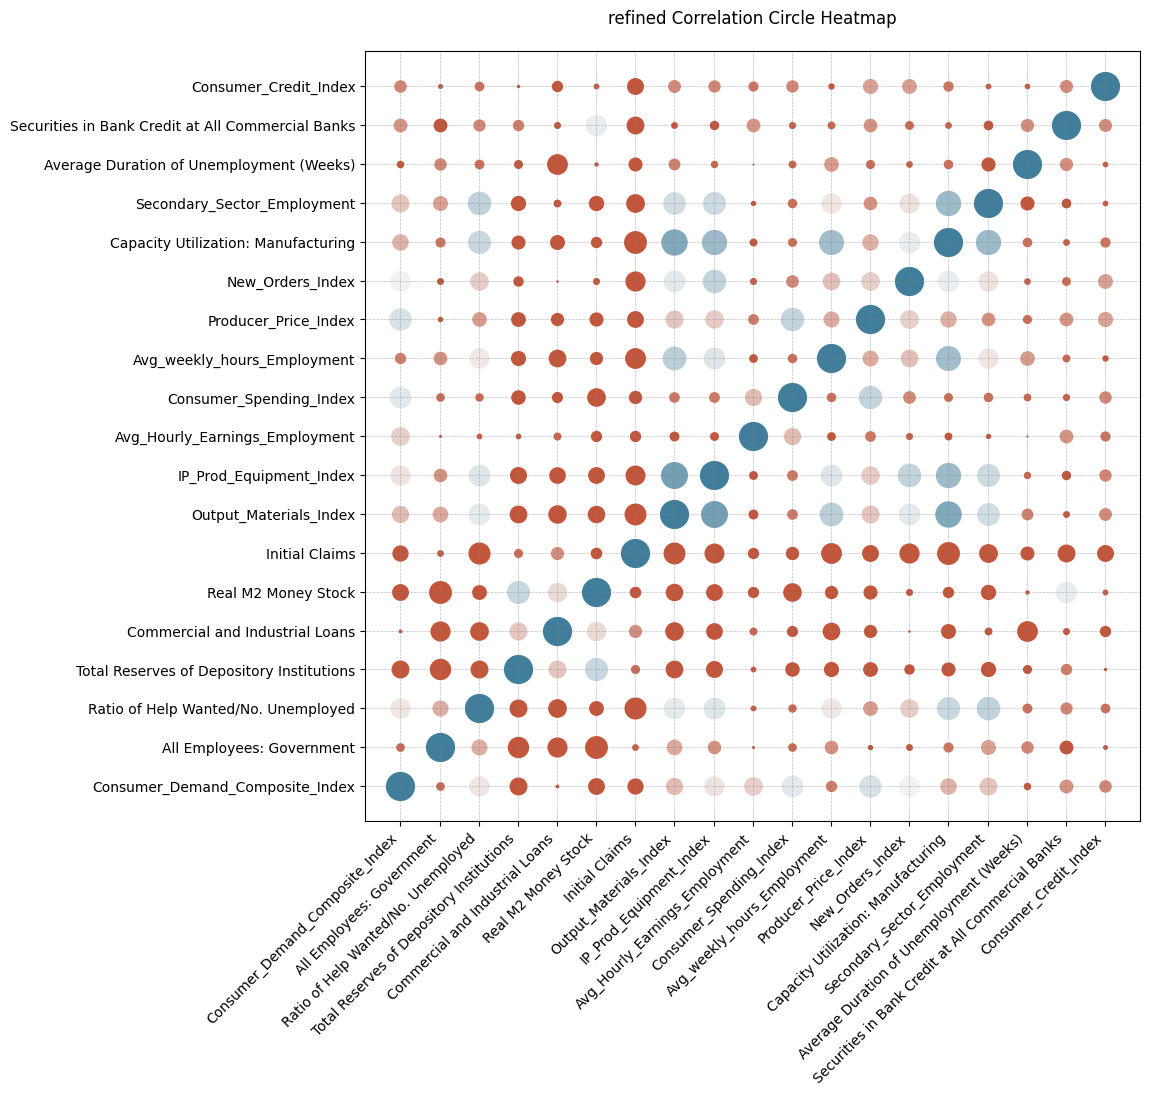

In [22]:
from utils.visualisation import plot_correlation_circle_heatmap

top_correlations = calculate_sorted_correlations(refined_dataset, 'PCE')

plot_correlation_circle_heatmap(refined_dataset, top_correlations_refined, top_n=20, fig_title='refined Correlation Circle Heatmap')

<div style="color:#00BFFF">

---

##### Linear Regression Analysis to Determine Variable Influence on PCE

This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the \( R^2 \) (coefficient of determination) metric.Variables with higher \( R^2 \) values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

**Steps in the Analysis:**

1. **Data Preparation:**
   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**
   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of \( R^2 \) Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the \( R^2 \) value.
   - The \( R^2 \) value indicates how much of the variance in 'PCE' is explained by the variable. A higher \( R^2 \) suggests a stronger explanatory power.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = refined_dataset.drop(columns=['PCE']).columns

# Prepare the dependent variable 'PCE'
dependent_var = refined_dataset['PCE']

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = refined_dataset[[var, 'PCE']].replace([np.inf, -np.inf], np.nan)#.dropna()
    
    #replace np.nan with 0
    combined_data = combined_data.dropna()

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data['PCE'].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(sorted(r2_values.items(), key=lambda item: item[1], reverse=True))


In [24]:
# Displaying the top few R^2 values for brevity
pprint(list(r2_values_sorted.items())[:10])

[('Consumer_Demand_Composite_Index', 0.32615424480198196),
 ('All Employees: Government', 0.2817235100910912),
 ('Ratio of Help Wanted/No. Unemployed', 0.26470853456683574),
 ('Total Reserves of Depository Institutions', 0.2644553882540125),
 ('Commercial and Industrial Loans', 0.25961392279048967),
 ('Real M2 Money Stock', 0.22824360502303886),
 ('Initial Claims', 0.22659367807583297),
 ('Output_Materials_Index', 0.19448860211617136),
 ('IP_Prod_Equipment_Index', 0.17219125415569492),
 ('Avg_Hourly_Earnings_Employment', 0.15635884794701038)]



   - The \( R^2 \) values are sorted in descending order, and the top results are displayed.
   - This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.

In [25]:
indicators = top_correlations_refined.drop('PCE')

# Assuming 'r2_values_sorted' and 'top_bottom_cor' are dictionaries or pandas Series
r2_values = pd.Series(r2_values_sorted)
cor_values = indicators #.drop('PCE')  # Exclude PCE as it's a self-correlation

# Merge the two Series into a DataFrame and add groups
comparison_df = pd.DataFrame({'R_squared': r2_values, 'Correlation': cor_values})


<div style="color:#00BFFF">

---

##### Proxy Evaluation and Variable Selection

For constructing a Vector Autoregression (VAR) model, choosing the right number of variables (proxies in this case) is crucial for the model's performance and interpretability. Using too many variables can lead to overfitting and computational complexity, while too few may miss out on important information.

Suggested Approach:
Set Thresholds for Correlation and R-squared:
A correlation threshold (e.g., |Correlation| > 0.3) helps ensure that only variables significantly related to consumer spending (PCE) are included.
An R-squared threshold (e.g., R-squared > 0.2) ensures the variable has decent predictive power.

In [26]:
# Set thresholds
corr_threshold = 0.3
r_squared_threshold = 0.2

# Filter based on the thresholds
filtered_proxies = comparison_df[
    (comparison_df['Correlation'].abs() > corr_threshold) |
    (comparison_df['R_squared'] > r_squared_threshold)]

# Now, 'filtered_proxies' contains variables meeting both criteria
selected_variables = filtered_proxies.index.tolist() # Use 'selected_variables' in VAR model

In [27]:
# Convert comparison_df.index to a list to ensure compatibility
columns_to_keep = selected_variables+['PCE']

# Filter the columns in final_proxy_dataset_for_validation
final_proxy_dataset = refined_dataset[columns_to_keep]

In [28]:
final_proxy_dataset.to_csv('./results/final_dataset/final_proxy_dataset.csv')

<div style="color:#00BFFF">

---

##### Stationary Assesment for Joined Dataset


**Stationarity Assessment**: Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.

**Addressing Non-Stationarity**: Techniques such as differencing or transformation will be applied to achieve stationarity, which is crucial for the accuracy and reliability of our predictive models and correlation analysis. 

In [29]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test
def adf_test(series, name=''):
    result = adfuller(series.dropna(), autolag='AIC')  # Drop NA values for the test
    conclusion = 'Stationary' if result[1] < 0.05 else 'Non-stationary'
    return {
        'Name': name,
        'Test Statistic': result[0],
        'P-Value': result[1],
        'Conclusion': conclusion
    }

# Selecting a subset of series for stationarity testing, including PCE
series_to_test = selected_variables
adf_results = [adf_test(final_proxy_dataset[series], name=series) for series in series_to_test]

adf_results_df = pd.DataFrame(adf_results)
adf_results_df

#add correlation and R^2 with PCE to the adf_results_df
adf_results_df['Correlation'] = [final_proxy_dataset[series].corr(final_proxy_dataset['PCE']) for series in series_to_test]
adf_results_df['R_squared'] = [r2_values_sorted[series] for series in series_to_test]

#add VIF to the adf_results_df
adf_results_df['VIF'] = [vif_data[vif_data['feature'] == series].VIF.values[0] for series in series_to_test]

#add its lead and lag analysis to the adf_results_df
pce_alternative_proxies = adf_results_df[['Name', 'Correlation','R_squared', 'VIF', 'Test Statistic', 'P-Value', 'Conclusion', ]]
pce_alternative_proxies

,Name,Correlation,R_squared,VIF,Test Statistic,P-Value,Conclusion
0,Consumer_Demand_Composite_Index,0.571099,0.326154,7.310158,-6.299330,3.443002e-08,Stationary
1,All Employees: Government,0.530776,0.281724,2.942389,-5.700805,7.684031e-07,Stationary
2,Ratio of Help Wanted/No. Unemployed,0.514498,0.264709,4.420161,-8.042015,1.836269e-12,Stationary
3,Total Reserves of Depository Institutions,-0.514252,0.264455,2.123866,-3.734745,3.650151e-03,Stationary
4,Commercial and Industrial Loans,-0.509523,0.259614,4.073774,-3.193433,2.036797e-02,Stationary
5,Real M2 Money Stock,-0.477748,0.228244,5.723152,-6.132487,8.337121e-08,Stationary
6,Initial Claims,-0.476019,0.226594,2.637391,-11.603285,2.617376e-21,Stationary
7,Output_Materials_Index,0.441009,0.194489,7.807158,-7.664880,1.651290e-11,Stationary
8,IP_Prod_Equipment_Index,0.414959,0.172191,8.596574,-9.484033,3.805024e-16,Stationary
9,Avg_Hourly_Earnings_Employment,0.395422,0.156359,4.558704,-0.440655,9.030864e-01,Non-stationary


<div style="color:#00BFFF">

---

##### Save Data

In [30]:
pce_alternative_proxies.to_csv('./results/final_dataset/pce_alternative_proxies.csv')